# imports


In [45]:
import os, glob
from functools import reduce
from os import path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

max_node_load_path = '/max(node_load15{hostname=~_water401_water427_water428_water449_}) by (domain)'
p99_path = '/p99_water401_water427_water428_water449'
sum_path = '/sum(rate(TRC_server_timer_count{_label_1=_recommendationRequests_, service=_taboola-trc)'
max_over_time_path = '/max(max_over_time(TRC_server_gauge{server=~_water401_water427_water428_water449_)'
avg_node_load15_path = '/avg(node_load15{hostname=~_water401_water427_water428_water449_}) by (domain)'
avg_count_node_cpu_seconds_path = '/avg(count (node_cpu_seconds_total{mode=_idle_,hostname=~_water401_water427_water428_water449_,job=~_node_exporter_}) by (hostname))'
avg_over_time_path = '/avg(avg_over_time(TRC_server_gauge{server=label_1=_MemoryUsage)'
avg_node_memory_path = '/avg(avg(node_memory_MemTotal_bytes{hostname=~_water401_water427_water428_water449_})) by (hostname)'

paths = [[max_node_load_path, 'max_node_CPU_load -CPU'], [p99_path, 'p99'], [sum_path, 'sum recoRate']
    , [max_over_time_path, 'max_HEAP-mem usage'], [avg_node_load15_path, 'avg_node_CPU_load'],
          [avg_over_time_path, 'avg_HEAP- mem usage']]

data_path = 'Data/Single servers/AM/'
cores_40_path = '40 cores 187.35 GB'
cores_40_path_copy = '40 cores 187.35 GB - Copy'
a4_dims = (11.7, 8.27)


In [46]:
def getCsv(data_path, core_path, metric_path, name_of_metric):
    all_files = glob.glob(os.path.join(data_path + core_path + metric_path, "*.csv"))
    all_csv = (pd.read_csv(f, sep=',') for f in all_files)
    new_csv = pd.concat(all_csv, ignore_index=True)
    new_csv.columns = ['dates', name_of_metric]
    return new_csv

In [47]:
csv_data_40_cores_6_days = [getCsv(data_path, cores_40_path_copy, path[0], path[1]) for path in paths]
csv_data_40_cores_6_days = reduce(lambda left, right: pd.merge(left, right, on=['dates'],
                                                        how='outer'), csv_data_40_cores_6_days)

csv_data_40_cores = [getCsv(data_path, cores_40_path_copy, path[0], path[1]) for path in paths]
csv_data_40_cores = reduce(lambda left, right: pd.merge(left, right, on=['dates'],
                                                        how='outer'), csv_data_40_cores)


# sacle - manual 

In [48]:
data_to_scale = csv_data_40_cores_6_days.drop('dates', 1)

normalized_df=(data_to_scale-data_to_scale.min())/(data_to_scale.max()-data_to_scale.min())
normalized_df = normalized_df.merge(
    right=csv_data_40_cores_6_days['dates'],
    left_index=True,
    right_index=True,
    suffixes=['', '_norm'])
normalized_df = normalized_df.melt('dates', var_name='all_data- 6 days',  value_name='vals')

In [49]:

data_to_scale = csv_data_40_cores.drop('dates', 1)
normalized_df_all_dates=(data_to_scale-data_to_scale.min())/(data_to_scale.max()-data_to_scale.min())
normalized_df_all_dates = normalized_df_all_dates.merge(
    right=csv_data_40_cores['dates'],
    left_index=True,
    right_index=True,
    suffixes=['', '_norm'])
normalized_df_all_dates_graph = normalized_df_all_dates.melt('dates', var_name='all_data',  value_name='vals')

# all_metrics- 6 days - normalized

(0.0, 1814.4)

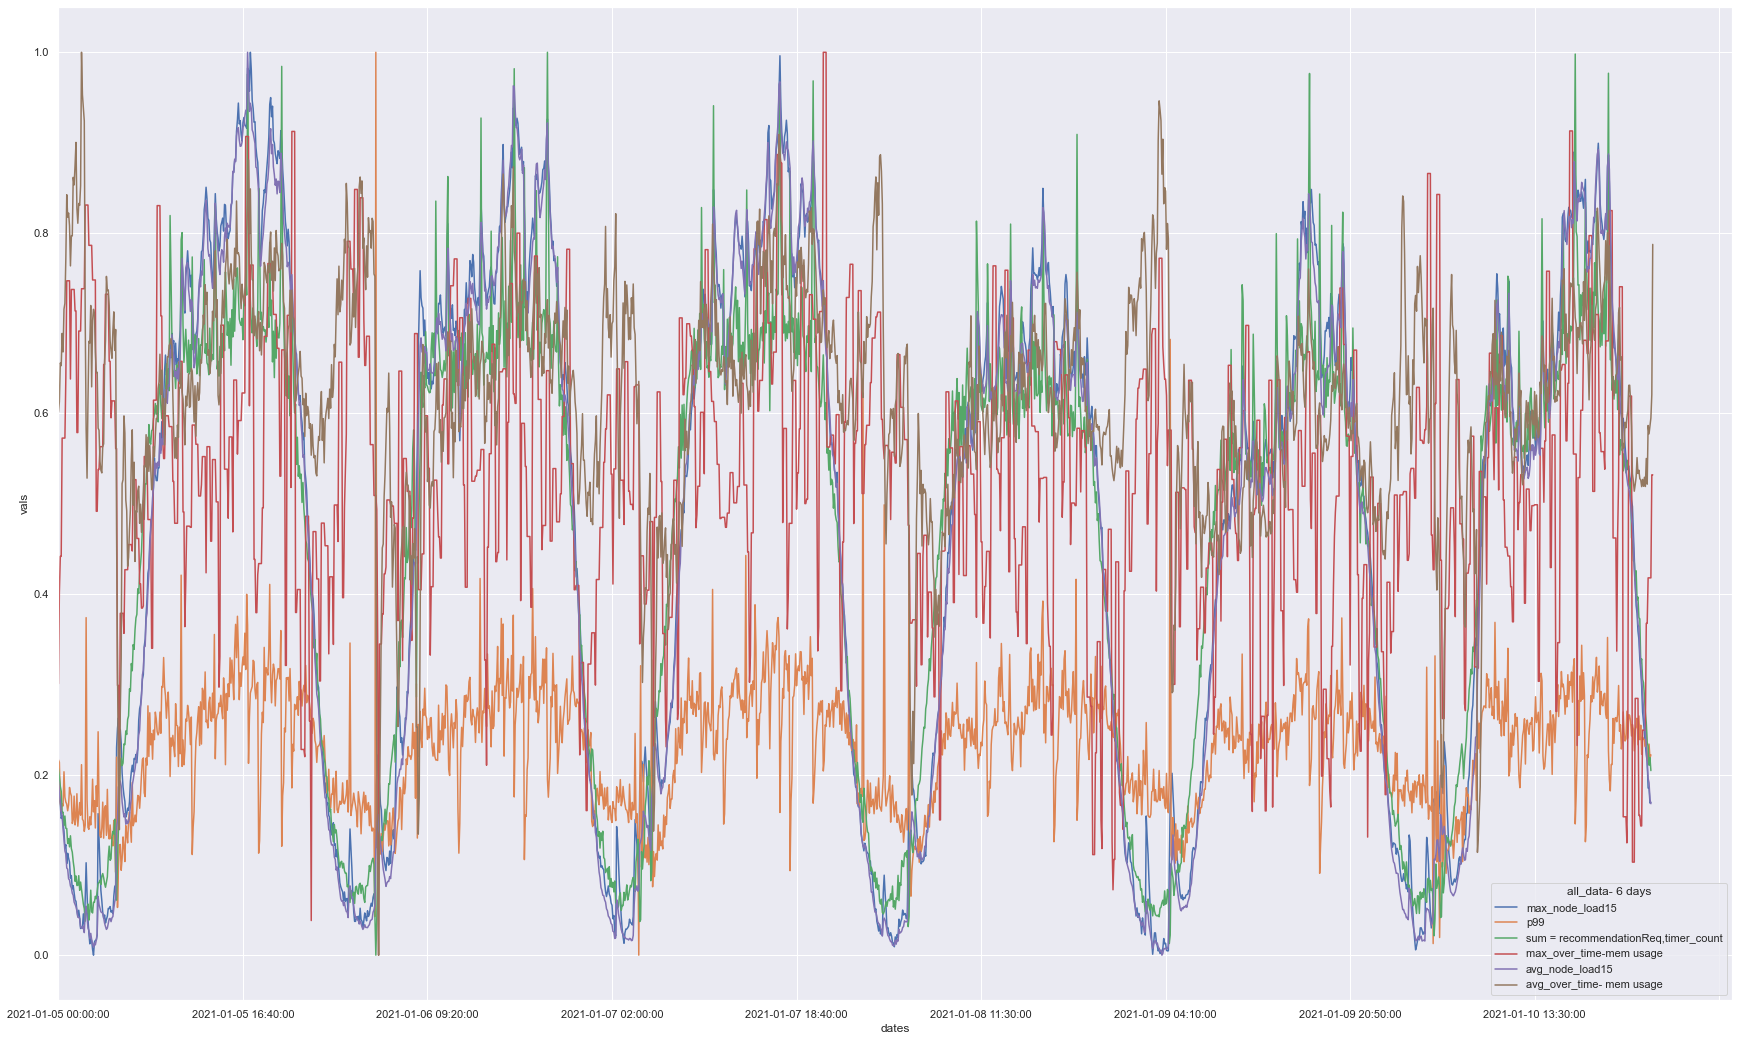

In [44]:
sns.set(rc={'figure.figsize': (30, 18.27)})
g = sns.lineplot(x="dates", y="vals", hue='all_data- 6 days', data=normalized_df)
g.xaxis.set_major_locator(MultipleLocator(200))
plt.xlim(0)


# all_metrics - normalized

In [37]:
normalized_df_all_dates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 0 to 2043
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   max_node_load15                      2042 non-null   float64
 1   p99                                  2041 non-null   float64
 2   sum = recommendationReq,timer_count  2041 non-null   float64
 3   max_over_time-mem usage              2044 non-null   float64
 4   avg_node_load15                      2042 non-null   float64
 5   avg_over_time- mem usage             2044 non-null   float64
 6   dates                                2044 non-null   object 
dtypes: float64(6), object(1)
memory usage: 192.3+ KB


# heat_map

<AxesSubplot:>

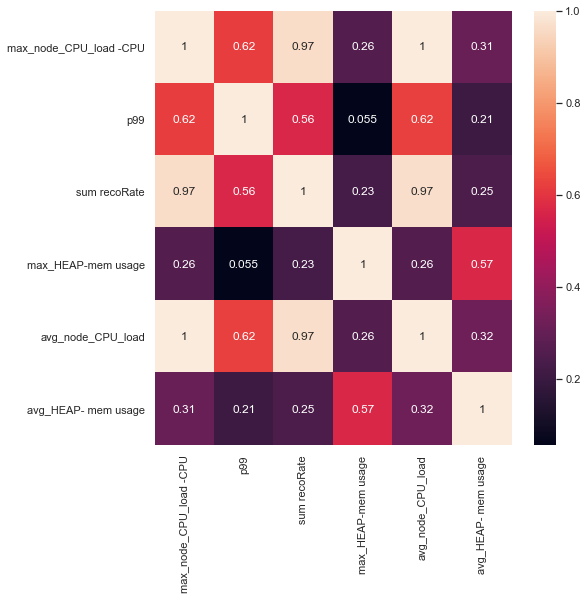

In [50]:
f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(normalized_df_all_dates.corr(), annot = True)

array([[<AxesSubplot:title={'center':'max_node_load15'}>,
        <AxesSubplot:title={'center':'p99'}>],
       [<AxesSubplot:title={'center':'sum = recommendationReq,timer_count'}>,
        <AxesSubplot:title={'center':'max_over_time-mem usage'}>],
       [<AxesSubplot:title={'center':'avg_node_load15'}>,
        <AxesSubplot:title={'center':'avg_over_time- mem usage'}>]],
      dtype=object)

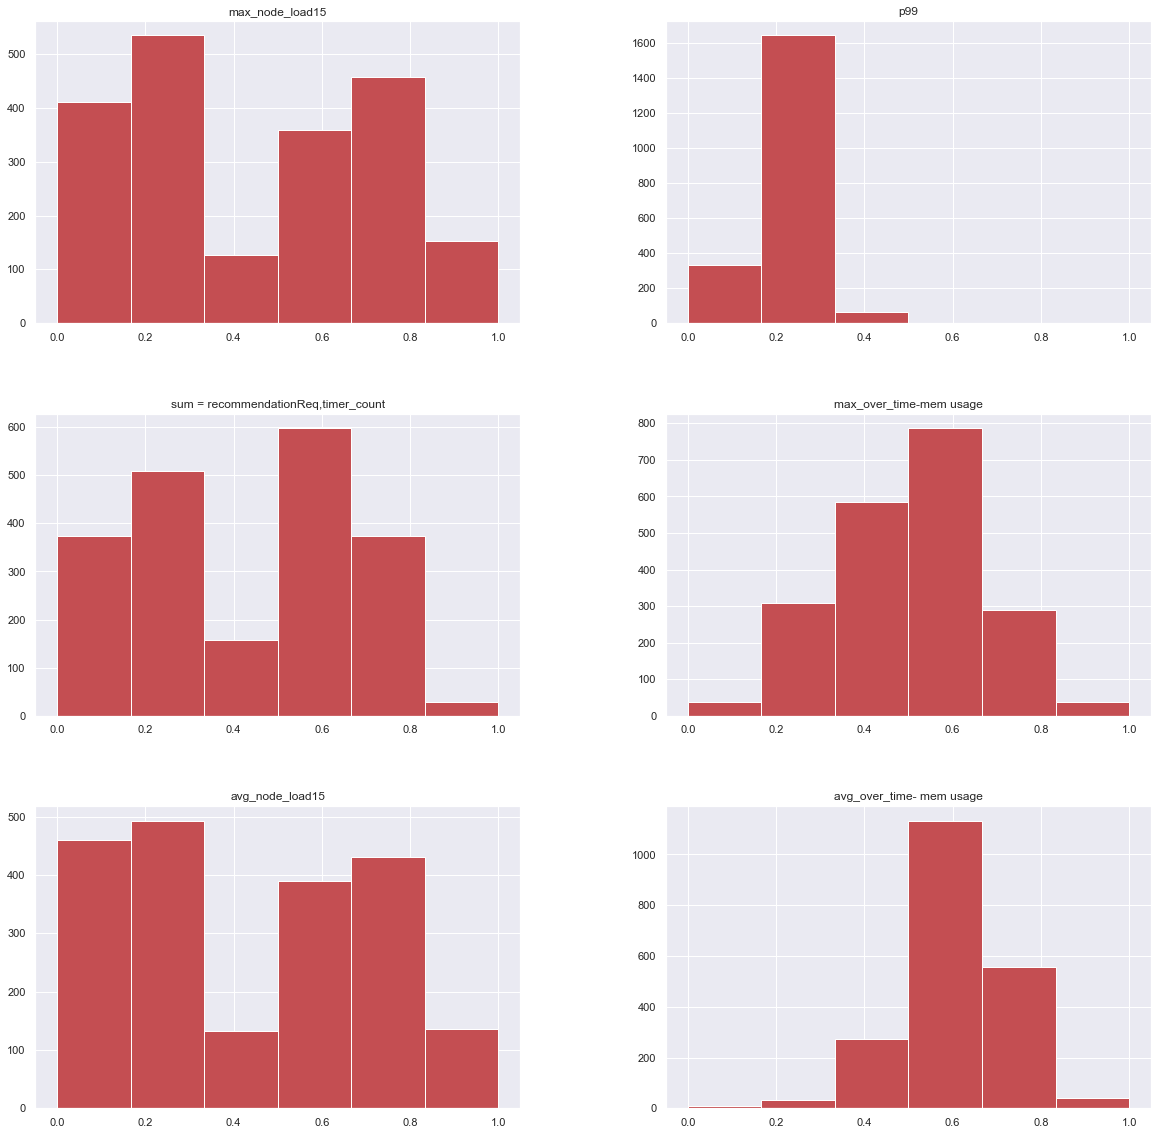

In [39]:
normalized_df_all_dates.hist(bins = 6, figsize = (20,20), color = 'r')

# all_metrics 

In [40]:
csv_data_40_cores.info

<bound method DataFrame.info of                     dates  max_node_load15         p99  \
0     2021-01-05 00:00:00            14.79  707.885317   
1     2021-01-05 00:05:00            13.64  701.891404   
2     2021-01-05 00:10:00            13.26  604.822940   
3     2021-01-05 00:15:00            12.53  582.867215   
4     2021-01-05 00:20:00            12.67  600.789308   
...                   ...              ...         ...   
2039  2021-01-10 23:50:00            14.20  746.092442   
2040  2021-01-10 23:55:00            13.37  712.272159   
2041  2021-01-11 00:00:00            13.40  719.926591   
2042  2021-01-08 10:25:00              NaN         NaN   
2043  2021-01-08 10:30:00              NaN         NaN   

      sum = recommendationReq,timer_count  max_over_time-mem usage  \
0                              124.578083              75264688128   
1                              119.825000              77586235392   
2                              113.920833              784984

<AxesSubplot:>

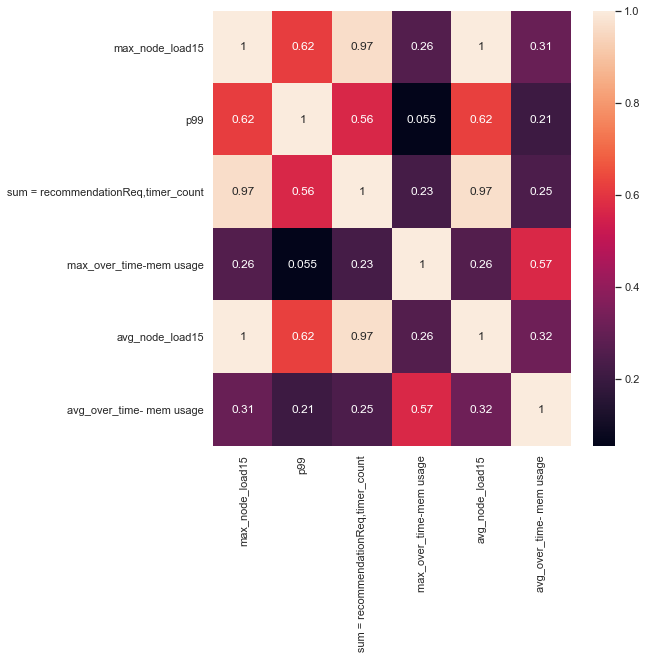

In [42]:
f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(csv_data_40_cores.corr(), annot = True,)

array([[<AxesSubplot:title={'center':'max_node_load15'}>,
        <AxesSubplot:title={'center':'p99'}>],
       [<AxesSubplot:title={'center':'sum = recommendationReq,timer_count'}>,
        <AxesSubplot:title={'center':'max_over_time-mem usage'}>],
       [<AxesSubplot:title={'center':'avg_node_load15'}>,
        <AxesSubplot:title={'center':'avg_over_time- mem usage'}>]],
      dtype=object)

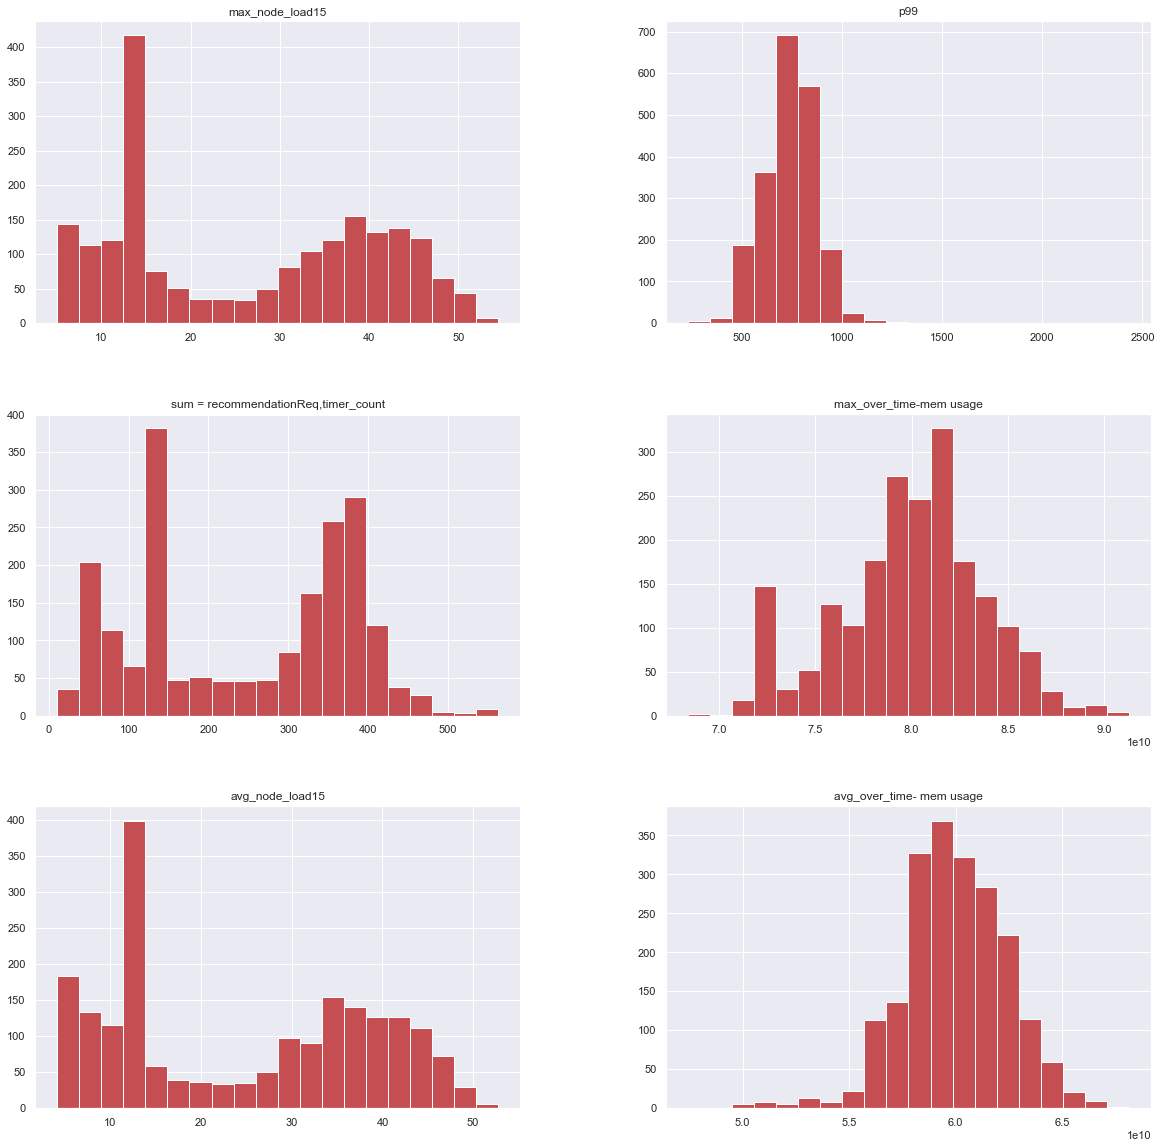

In [43]:
csv_data_40_cores.hist(bins = 20, figsize = (20,20), color = 'r')